# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary
from sklearn.model_selection import train_test_split

In [141]:
y_pred_test_global = None

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [142]:
# your code here
# Calculate the mean and variance of the feature values for each class
def calculate_mean_var(X,Y):
    # your code here
    feature_count = X.shape[1]
    class_count = len(np.unique(Y))
    mean = X.groupby(by = Y).mean()
    var = X.groupby(by = Y).var()

    # print("Mean: ", mean)
    # print("Variance: ", var)

    # Combining Mean and Variance for each Feature
    m = np.array(mean)
    v = np.array(var)

    mean_var = []

    for i in range(len(m)):
        m_row = m[i] # Mean of Every Feature for each class
        v_row = v[i] # Variance of Every Feature for each class

        for index, value in enumerate(m_row):
            mean_v = value
            var_v = v_row[index]
            mean_var.append([mean_v, var_v])

    # Splitting Mean_var class wise
    mean_var2 = np.array(mean_var)
    
    mean_var3 = np.split(mean_var2, class_count)

    return mean_var3

### Calculate priors

Write a function to calculate the priors for each class.

In [143]:
# your code here
def prior_probab(y_train):
    prob = {}
    for val in y_train:
        if val in prob:
            prob[val] += 1
        else:
            prob[val] = 1
    total_count = len(y_train)
    for key in prob:
        prob[key] = prob[key]/total_count
    return prob

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [144]:
# your code here


In [145]:
# Build the Gaussian Naive Bayes 
def gnd(x_val, x_mean, x_var):
    mean = x_mean
    e = np.e
    pi = np.pi
    eq1 = 1/(np.sqrt(2*pi*x_var))
    eq2 = np.exp(-((x_val-mean)**2)/(2*x_var)) 
    prob = eq1*eq2
    return prob

In [146]:
def find_class(posterior_prob,classes):
    prob_index = posterior_prob.index(max(posterior_prob))
    return classes[prob_index]

In [147]:
def gnd_helper(mean_var, x_test, prior_prob, classes):
    n_classes = len(mean_var)
    prob_lis = []
    for i in range(n_classes):
        class1 = mean_var[i]
        for i in range(len(class1)):
            class1_mean_val = class1[i][0]
            class1_var_val = class1[i][1]
            x_val = x_test[i]
            prob = gnd(x_val, class1_mean_val, class1_var_val)
            prob_lis.append([prob])
    prob_arr = np.array(prob_lis)
    prob_arr = np.split(prob_arr, n_classes)
    # print(prob_arr)

    # Calculating the posterior probability
    posterior_prob = []
    for i in range(1,len(prob_arr)+1):
        prob = np.prod(prob_arr[i-1])*prior_prob[i]
        posterior_prob.append(prob)
    
    return posterior_prob
    
    



In [148]:
def class_pred(X_test,y_test, mean_var, prior_prob, classes):
    X_test = np.array(X_test)
    y_pred = []
    for x in X_test:
        # print(x)
        posterior_probab = gnd_helper(mean_var, x, prior_prob, classes)
        class_pred = find_class(posterior_probab, classes)
        y_pred.append(class_pred)
    # Calculating the accuracy
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    global y_pred_test_global
    y_pred_test_global = y_pred

    accuracy = (np.sum(y_test == y_pred)/len(y_test))*100
    print("Accuracy: ", accuracy)


In [149]:
def predict(X, Y):
    # x = [-37,-59,-57,-43,-73,-65,-66]
    classes = np.unique(Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    mean_var = calculate_mean_var(X_train,y_train)
    prior_prob = prior_probab(y_train)

    return X_train, X_test, y_train, y_test, mean_var, prior_prob, classes
    
    
    
    

In [150]:
def posterior_compute(X_test,y_test, mean_var, prior_prob, classes):
    X_test = np.array(X_test)
    # y_pred = []
    posterior_probab_lis = []
    for x in X_test:
        posterior_probab = gnd_helper(mean_var, x, prior_prob, classes)
        posterior_probab_lis.append(posterior_probab)
    return posterior_probab_lis

In [151]:
def class_wise_prob_compute(prob_lis,i):
    prob = []
    for probab in prob_lis:
        prob.append(probab[i])
    return prob

In [152]:
def plot_pdf(X_test,y_test, mean_var, prior_prob, classes):
    prob_lis = posterior_compute(X_test,y_test, mean_var, prior_prob, classes)
    class1_probab_lis = class_wise_prob_compute(prob_lis,0)
    class2_probab_lis = class_wise_prob_compute(prob_lis,1)
    class3_probab_lis = class_wise_prob_compute(prob_lis,2)
    class4_probab_lis = class_wise_prob_compute(prob_lis,3)
    class_probs = [class1_probab_lis,class2_probab_lis,class3_probab_lis,class4_probab_lis]
    pdf = []
    for i in range(len(class_probs)):
        pdf.append(sum(class_probs[i])/len(class_probs[i]))
    plt.plot(pdf)
    plt.show()

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [153]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')

In [154]:
# your code here
X = data[['ws1','ws2','ws3','ws4','ws5','ws6','ws7']]
Y = data['r']

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [155]:
# your code here
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## Classification

In [156]:
X_train, X_test, y_train, y_test, mean_var, prior_prob, classes = predict(X,Y)

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [157]:
def calculate_mean_var_cls(X,prob_lis):

    prob_lis = np.array(prob_lis)
    prob_lis = np.argmax(prob_lis, axis=1)
    
    X = np.array(X)
    X = X.mean(axis=1)
    print(X.shape)
    X_lis = []
    mean_lis = []
    var_lis = []

    for i in range(4):
        X1 = X[prob_lis == i]
        mean = X1.mean()
        var = X1.var()
        X_lis.append(X1)
        mean_lis.append(mean)
        var_lis.append(var)

  
    return X_lis,mean_lis, var_lis


(500,)


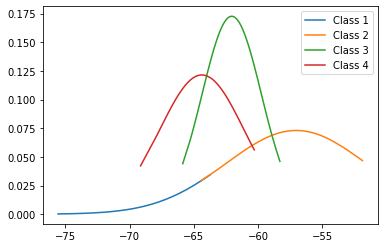

In [158]:
from scipy.stats import norm
prob_lis = posterior_compute(X_test,y_test, mean_var, prior_prob, classes)
X_lis, mean_cls, var_cls = calculate_mean_var_cls(X_test,prob_lis)


X_lis[0] = np.sort(X_lis[0])
X_lis[1] = np.sort(X_lis[1])
X_lis[2] = np.sort(X_lis[2])
X_lis[3] = np.sort(X_lis[3])


# print(X_lis[0].shape)
# print(X_lis[1].shape)



plt.plot(X_lis[0], norm.pdf(X_lis[0], mean_cls[1], var_cls[1]))
plt.plot(X_lis[1], norm.pdf(X_lis[1], mean_cls[1], var_cls[1]))
plt.plot(X_lis[2], norm.pdf(X_lis[2], mean_cls[2], var_cls[2]))
plt.plot(X_lis[3], norm.pdf(X_lis[3], mean_cls[3], var_cls[3]))
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.show()





In [159]:
# your code here
print("For Training Data")
class_pred(X_train,y_train, mean_var, prior_prob, classes)
# plot_pdf(X_train,y_train, mean_var, prior_prob, classes)


For Training Data
Accuracy:  98.33333333333333


In [160]:
print("For Testing Data")
class_pred(X_test,y_test, mean_var, prior_prob, classes)


For Testing Data
Accuracy:  98.2


Identifying the mis predicted Sample

In [161]:
type(y_pred_test_global)
y_test1 = np.array(y_test)
# Find index where y_test1 and y_pred_test_global are not equal
index = np.where(y_test1 != y_pred_test_global)
# print(type(X_test))
x_test_wp = []



# print(index)
for i in index:
    x_test_wp.append(X_test.iloc[i].values)
x_test_wp = np.array(x_test_wp)

# print(x_test_wp[0])
x_test_wp = x_test_wp[0]

x_test_wp = np.array(x_test_wp)

x_mean_val = x_test_wp.mean(axis=1)
# print(x_mean_val)

# print(y_pred_test_global[index])
# print(y_test1[index])



In [162]:
def plot_mis_clf(mis_clf_x):
    prob_lis = posterior_compute(X_test,y_test, mean_var, prior_prob, classes)
    X_lis, mean_cls, var_cls = calculate_mean_var_cls(X_test,prob_lis)


    X_lis[0] = np.sort(X_lis[0])
    X_lis[1] = np.sort(X_lis[1])
    X_lis[2] = np.sort(X_lis[2])
    X_lis[3] = np.sort(X_lis[3])


    # print(X_lis[0].shape)
    # print(X_lis[1].shape)

    fig = plt.figure()


    plt.plot(X_lis[0], norm.pdf(X_lis[0], mean_cls[1], var_cls[1]))
    plt.plot(X_lis[1], norm.pdf(X_lis[1], mean_cls[1], var_cls[1]))
    plt.plot(X_lis[2], norm.pdf(X_lis[2], mean_cls[2], var_cls[2]))
    plt.plot(X_lis[3], norm.pdf(X_lis[3], mean_cls[3], var_cls[3]))
    plt.axvline(x = mis_clf_x, color = 'b', label = 'Mis-Classified')
    plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'])
    plt.show()
    return fig


(500,)


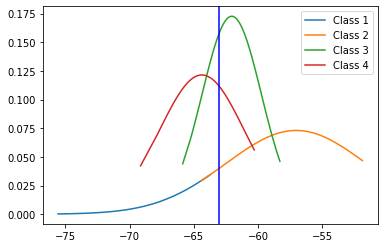

Actual Class =  3
Predicted Class =  4


In [163]:
fig1 = plot_mis_clf(x_mean_val[0])
print("Actual Class = ",y_test1[index][0]+1)
print("Predicted Class = ",y_pred_test_global[index][0]+1)


(500,)


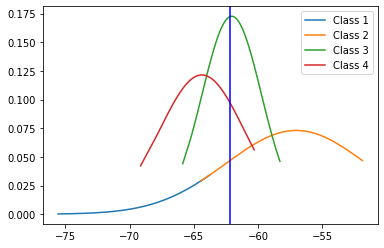

Actual Class =  3
Predicted Class =  4


In [164]:
fig1 = plot_mis_clf(x_mean_val[1])
print("Actual Class = ",y_test1[index][0]+1)
print("Predicted Class = ",y_pred_test_global[index][0]+1)

In [165]:
# Comparison with sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ", (np.sum(y_test == y_pred)/len(y_test))*100)

Accuracy:  98.2


### Covariance Matrix

In [166]:
print(X_train.shape)
# x_train_arr_t = np.transpose(np.array(X_train))
x_train_arr_t = (np.array(X_train))
# print(x_train_arr_t.shape)
# print(type(x_train_arr_t))
x_train_df = pd.DataFrame(x_train_arr_t, columns = ['ws1','ws2','ws3', 'ws4', 'ws5', 'ws6', 'ws7'])
x_train_df.head()

y_train_df = pd.DataFrame(y_train, columns = ['r'])

df = x_train_df.join(y_train_df['r'])
df = df.dropna()
df.head()


data_arr = np.transpose(np.array(df))


cov_matrix = np.cov(data_arr, bias=True)
print(cov_matrix.shape)
df1 = pd.DataFrame(cov_matrix, columns = ['ws1','ws2','ws3', 'ws4', 'ws5', 'ws6', 'ws7','r'], index = ['ws1','ws2','ws3', 'ws4', 'ws5', 'ws6', 'ws7','r'])
# df1

(1500, 7)
(8, 8)


Now as we can see that the features are not independent of each other, and ws1 and ws4 are highly correlated. Hence we can use any one of the feature but we will drop ws4 as it is more correlated with the class label.

In [167]:
def expermient(X1, Y1, col_name):
    X1 = X1.drop(col_name, axis='columns')
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42) 
    gnb = GaussianNB()
    gnb.fit(X_train1, y_train1)
    y_pred1 = gnb.predict(X_test1)
    print("Accuracy after dropping",col_name,"is", (np.sum(y_test1 == y_pred1)/len(y_test1))*100)


We can see that the accuracy remained same after dropping ws4.But instead if we woud have dropped ws1 then the accuracy would have decreased.

In [168]:
expermient(X, Y, 'ws1')
expermient(X, Y, 'ws4')

Accuracy after dropping ws1 is 96.8
Accuracy after dropping ws4 is 98.2
